In [1]:
import pandas as pd
import numpy as np
import matplotlib
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from keras import Sequential
from keras import layers
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
import collections
from matplotlib import pyplot as plt


df = pd.read_csv('ReadyPragAirBnB.csv',sep=';', index_col=0)
df.head(5)

Using TensorFlow backend.


,RoomID,Name,HostID,Neighbourhood,RoomType,Price,MinNights,NumReviews,RoomsPerHost,Availibility,Location,Latitude,Longtitude,PriceCategory
0,25092602,❤️AMAZING APARTMENT WITH NETFLIX NEAR CENTRE❤️,189676842,Praha 3,Entire home/apt,1310,1,79,1,172,"Czech republic, Prague, Praha 3",50.086376,14.444495,střední
1,25197350,Room in beautiful area close to Prague Castle,28365945,Praha 6,Private room,763,1,2,1,0,"Czech republic, Prague, Praha 6",50.083104,14.369196,nízká
2,25470062,Luxury apartment in the center of Prague,47717433,Praha 2,Entire home/apt,1071,2,84,1,109,"Czech republic, Prague, Praha 2",50.073298,14.439128,střední
3,25547218,Much More For Your Money In Beautiful Letná,21217319,Praha 7,Entire home/apt,2074,1,21,1,0,"Czech republic, Prague, Praha 7",50.102008,14.417981,vysoká
4,25907826,Apartment near city transport and Prague center,119497941,Praha 4,Entire home/apt,2504,1,16,1,0,"Czech republic, Prague, Praha 4",50.057750,14.450172,vysoká


In [3]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

prepDf = pd.DataFrame(data=df)
prepDf.drop(['Name','RoomID','Location','Price'],axis=1,inplace=True)

le = preprocessing.LabelEncoder()
le.fit(prepDf['Neighbourhood'])
prepDf['Neighbourhood']=le.transform(prepDf['Neighbourhood'])

le = preprocessing.LabelEncoder()
le.fit(prepDf['RoomType'])
prepDf['RoomType']=le.transform(prepDf['RoomType'])


prepDf.head()

,HostID,Neighbourhood,RoomType,MinNights,NumReviews,RoomsPerHost,Availibility,Latitude,Longtitude,PriceCategory
0,189676842,31,0,1,79,1,172,50.086376,14.444495,střední
1,28365945,34,2,1,2,1,0,50.083104,14.369196,nízká
2,47717433,27,0,2,84,1,109,50.073298,14.439128,střední
3,21217319,35,0,1,21,1,0,50.102008,14.417981,vysoká
4,119497941,32,0,1,16,1,0,50.057750,14.450172,vysoká


In [4]:
X = prepDf[['Neighbourhood','Latitude','Longtitude','RoomType','MinNights','NumReviews','RoomsPerHost','Availibility']]
y = prepDf['PriceCategory']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [5]:
##knn

from sklearn.neighbors import KNeighborsClassifier


knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)

train_pred = knn.predict(X_train)
y_pred=knn.predict(X_test)

In [6]:
knnPred = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': y_pred})
knnPred.head(30)

,Actual Values,Predicted Values
0,vysoká,nejvyšší
1,nízká,nejvyšší
2,nejvyšší,nejvyšší
3,střední,střední
4,vysoká,vysoká
5,střední,nízká
6,nízká,vysoká
7,nejvyšší,nejvyšší
8,vysoká,vysoká
9,nejvyšší,nízká


In [7]:
from sklearn.metrics import accuracy_score
knnScore = accuracy_score(y_test, y_pred, normalize=True)
print('knnScore: ', knnScore*100,'%')

knnScore:  40.389972144846794 %


In [8]:
from sklearn.metrics import accuracy_score
knnScore = accuracy_score(y_train, train_pred, normalize=True)
print('knnScore: ', knnScore*100,'%')

knnScore:  53.40230799840827 %


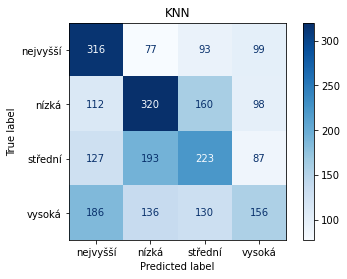

In [9]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(knn, X_test, y_test,                                            
                                 cmap=plt.cm.Blues)
plt.title('KNN')
plt.show()

In [10]:
#naiveBayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train);

y_pred = model.predict(X_test)

In [11]:
naiveBayesPred = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': y_pred})
naiveBayesPred.head(30)

,Actual Values,Predicted Values
0,vysoká,nejvyšší
1,nízká,nízká
2,nejvyšší,nejvyšší
3,střední,nejvyšší
4,vysoká,střední
5,střední,nejvyšší
6,nízká,nízká
7,nejvyšší,nízká
8,vysoká,nejvyšší
9,nejvyšší,vysoká


In [12]:
naiveBayesScore = accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
print('naiveBayesScore :', naiveBayesScore*100,'%')

naiveBayesScore : 40.350179068842024 %


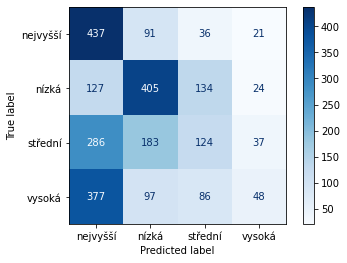

In [13]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(model, X_test, y_test,                                            
                                 cmap=plt.cm.Blues)

plt.show()

In [14]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', random_state=0).fit(X_train, y_train)
y_pred = model.predict(X_test)

In [15]:
logRegPred = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': y_pred})
logRegPred.head(30)

,Actual Values,Predicted Values
0,vysoká,nejvyšší
1,nízká,nízká
2,nejvyšší,nejvyšší
3,střední,vysoká
4,vysoká,střední
5,střední,vysoká
6,nízká,vysoká
7,nejvyšší,nejvyšší
8,vysoká,vysoká
9,nejvyšší,střední


In [16]:
logRegScore = accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
print('logRegScore :', logRegScore*100,'%')

logRegScore : 41.78272980501393 %


In [17]:
#decTree
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
model=dtree.fit(X_train,y_train)
y_predTree = model.predict(X_test)

In [18]:
decTreePred = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': y_predTree})
decTreePred.head(20)

,Actual Values,Predicted Values
0,vysoká,vysoká
1,nízká,nízká
2,nejvyšší,nejvyšší
3,střední,střední
4,vysoká,nízká
5,střední,střední
6,nízká,nízká
7,nejvyšší,nejvyšší
8,vysoká,vysoká
9,nejvyšší,střední


In [19]:
decTreeScore = accuracy_score(y_test, y_predTree, normalize=True, sample_weight=None)
print('decTreeScore :', decTreeScore*100,'%')

decTreeScore : 46.796657381615596 %


In [20]:
#random forest
from sklearn.ensemble import RandomForestClassifier

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


cv = KFold(n_splits=10, random_state=1, shuffle=True)


classifier = RandomForestClassifier(n_estimators = 250, random_state = 0)

model=classifier.fit(X_train, y_train)  

scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), max(scores)))


y_pred = model.predict(X_test)


Accuracy: 0.542 (0.567)


In [21]:
ranForPred = pd.DataFrame({
        'ActualValues': np.array(y_test).flatten(),
        'PredictedValues': y_pred})
ranForPred.head(30)

,ActualValues,PredictedValues
0,vysoká,nejvyšší
1,nízká,nízká
2,nejvyšší,nejvyšší
3,střední,střední
4,vysoká,vysoká
5,střední,střední
6,nízká,nízká
7,nejvyšší,nejvyšší
8,vysoká,vysoká
9,nejvyšší,vysoká


In [22]:
ranForScore = accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
print('ranForScore :', ranForScore*100,'%')

ranForScore : 54.19816951850378 %


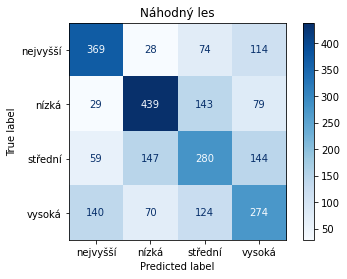

In [23]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(model, X_test, y_test,                                            
                                 cmap=plt.cm.Blues)
plt.title('Náhodný les')
plt.savefig('ranForClas.png', dpi=1500)
plt.show()


In [24]:
ranForPred.PredictedValues.value_counts()

nízká       684
střední     621
vysoká      611
nejvyšší    597
Name: PredictedValues, dtype: int64

In [124]:
ranForPred.ActualValues.value_counts()

nízká       1261
střední      890
vysoká       231
nejvyšší     131
Name: ActualValues, dtype: int64

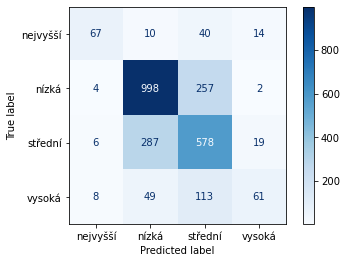

In [143]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(model, X_test, y_test,                                            
                                 cmap=plt.cm.Blues)

plt.show()

In [ ]:
fig, ax = plt.subplots()
ranForPred.plot.bar(x=, ax=ax)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

In [26]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
model = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

clf = GridSearchCV(model, parameter_space, n_jobs=-1, cv=3)

clf.fit(train_scaled, y_train)

C:\Users\mates\anaconda3\envs\bpEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [27]:
mlp_pred = clf.predict(test_scaled)

In [28]:
accuracy_score(y_test, mlp_pred)

0.47990449661758855

In [29]:
mlpPred = pd.DataFrame({
        'ActualValues': np.array(y_test).flatten(),
        'PredictedValues': mlp_pred})
mlpPred.head(30)

,ActualValues,PredictedValues
0,vysoká,nejvyšší
1,nízká,nejvyšší
2,nejvyšší,nejvyšší
3,střední,střední
4,vysoká,vysoká
5,střední,střední
6,nízká,nízká
7,nejvyšší,nejvyšší
8,vysoká,vysoká
9,nejvyšší,vysoká


In [30]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

params = {
        'n_estimators': stats.randint(150, 1000),
        'learning_rate': stats.uniform(0.01, 0.6),
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0,2],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [6,7,8,9,10]
        
        }
xgb = XGBClassifier()
rs = RandomizedSearchCV(xgb, param_distributions=params, n_iter=5, n_jobs=4, cv=5, verbose=3, random_state=1001 )
rs.fit(X_train, y_train)


y_pred = rs.best_estimator_.predict(X_test)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:   32.7s finished


In [31]:
accuracy_score(y_test, y_pred)

0.524074810982889

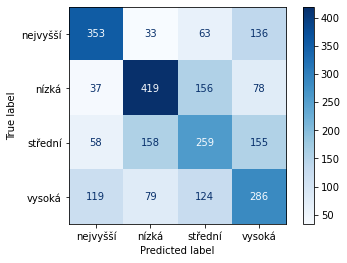

In [34]:
disp = plot_confusion_matrix(rs.best_estimator_, X_test, y_test,                                            
                                 cmap=plt.cm.Blues)

plt.show()

In [33]:
xgbPred = pd.DataFrame({
        'ActualValues': np.array(y_test).flatten(),
        'PredictedValues': y_pred})
xgbPred.head(30)

,ActualValues,PredictedValues
0,vysoká,vysoká
1,nízká,nejvyšší
2,nejvyšší,nejvyšší
3,střední,střední
4,vysoká,nejvyšší
5,střední,nízká
6,nízká,nízká
7,nejvyšší,nejvyšší
8,vysoká,vysoká
9,nejvyšší,střední
